<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Can Standardized Test Be Used As The Only Way To Reduce Drop Out?

## Problem Statement

- To determine if standardized test is the only way for admissions process for predicting and reducing the number of dropouts.

## Table Content:
- [Background](#Background)
- [Assumptions](#Assumptions)
- [Data Import & Cleaning](#Data-Import-&-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Data-Visualization)
- [Conclusions & Recommendations](#Conclusions-&-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources:
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from students' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

These measures have been used to measure the retention rate in students in university ([*source*](https://satsuite.collegeboard.org/media/pdf/national-sat-validity-study-overview-admissions-enrollment-leaders.pdf)). With student's tution fee as one of the university's source of revenue, higher retention rate in students means that university will have a more stable source of reveune. ([*source*](https://www.statista.com/statistics/240889/revenue-sources-of-us-higher-education-insitutions/)) 

Therefore, the target audience will be the finance administrators in the university to decide if the standardized test is the only way for predicting and reducing the number of dropouts.

## Assumptions

The assumptions made for this analysis are the following:
- Students have enough money to study for the entire university.
- Students who dropout are due to only acdamic reasons.
- Students always put in their best effort in each exam/tests.
- Since [SAT and ACT test are highly correlated](https://www.hartlandschools.us/documents/curriculum/PLAN-PSAT-ACT-SAT%20Assessment%20Correlations%20-%20Washtenaw%20ISD%202015.pdf) , either SAT or ACT scores will produce the similar results. For this analysis, SAT scores will be used.
- Dropout rates throughout the years are almost the same. ([*source*](https://educationdata.org/college-dropout-rates))

## Coding Challenges

### 1. Create a mean function

In [1]:
def mean(samples):
    return sum(samples) / len(samples)

Test the mean function :

In [2]:
mean([1,2,3,4,5,6,7,8,9])

5.0

### 2. Create a standard deviation

-    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

In [3]:
def standard_dev(sample):
    return ((sum([float(values-mean(sample))**2 for values in sample]))/len(sample))**0.5

Test the standard deviation function :

In [4]:
standard_dev([1,2,3,4,5,6,7,8,9,10])

2.8722813232690143

### 3. Data cleaning function :

- A data cleaning function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent.

In [5]:
def data_cleaning(value=""):
    return float(value.translate({ord('%'): None}))/100

Test the data cleaning function : 

In [6]:
data_cleaning("50%")

0.5

## Imports of libraries

In [7]:
import pandas as pd 


import numpy as np


import matplotlib.pyplot as plt


import scipy as sp

import seaborn as sns

## Data Import & Cleaning

### Datasets

There are 4 datasets are used. The below are the 4 datasets :

* [`Dropout_rates`](https://educationdata.org/college-dropout-rates): Dropout rates by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2020.csv`](./data/sat_2020.csv): 2020 SAT Scores by State
* [`sat_2021.csv`](./data/sat_2021.csv): 2021 SAT Scores by State

### 1st Dataset : Dropout Rates by State

In [8]:
dropout_rates={
    "state" :["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","D.C",
               "Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana",
               "Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
               "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina",
               "North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina",
               "South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia",
               "Wisconsin","Wyoming","U.S. Territories","Multi State","POIs"
              ],
    "drop_out_percent" :[24.8,43.9,44.1,39.7,30.2,27.1,29.3,53.7,41.5,39.5,44.1,49.8,40.0,35.7,35.1,35.0,35.4,33.5,
                         36.1,34.2,37.4,32.7,37.6,30.2,45.0,37.1,34.9,26.9,28.5,36.7,37.5,37.3,35.3,33.8,37.9,31.9,
                         42.4,24.5,34.9,32.5,38.0,37.3,37.3,43.6,34.4,31.2,30.8,22.7,36.6,25.8,28.2,72.7,40.6,25.1
                        ]
}

#convert from dict to data frame
dropout_rates=pd.DataFrame.from_dict(dropout_rates)

#Display top and bottom 5 rows
display(dropout_rates.head())
display(dropout_rates.tail())

,state,drop_out_percent
0,Alabama,24.8
1,Alaska,43.9
2,Arizona,44.1
3,Arkansas,39.7
4,California,30.2


,state,drop_out_percent
49,Wisconsin,25.8
50,Wyoming,28.2
51,U.S. Territories,72.7
52,Multi State,40.6
53,POIs,25.1


In [9]:
#Convert dropout % to decimal and put it in a new column
dropout_rates["dropout_rate"]=dropout_rates["drop_out_percent"]/100

#Remove dropout percent
dropout_rates=dropout_rates.drop("drop_out_percent",axis=1)

#Check results
display(dropout_rates.head())

,state,dropout_rate
0,Alabama,0.248
1,Alaska,0.439
2,Arizona,0.441
3,Arkansas,0.397
4,California,0.302


### 2nd dataset :  2019 SAT Scores by State

In [10]:
#Import data
df_sat19=pd.read_csv("data/sat_2019.csv")

#Display top and bottom 5 rows
display(df_sat19.head())
display(df_sat19.tail())

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


,State,Participation Rate,EBRW,Math,Total
48,Virginia,68%,567,551,1119
49,Washington,70%,539,535,1074
50,West Virginia,99%,483,460,943
51,Wisconsin,3%,635,648,1283
52,Wyoming,3%,623,615,1238


In [11]:
#Check for missing columns not shown above
display(df_sat19.columns)

Index(['State', 'Participation Rate', 'EBRW', 'Math', 'Total'], dtype='object')

In [12]:
#Check for types and missing data in columns
df_sat19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [13]:
#Check for duplicates
df_sat19.duplicated().sum()

0

In [14]:
#Check for unique values in participation rate column
np.unique(df_sat19["Participation Rate"])

array(['100%', '18%', '19%', '2%', '20%', '22%', '3%', '31%', '4%', '41%',
       '5%', '51%', '54%', '6%', '63%', '66%', '68%', '7%', '70%', '71%',
       '79%', '81%', '82%', '9%', '94%', '95%', '99%', '—'], dtype=object)

In [15]:
#Drop "-" in participation rate
df_sat19 = df_sat19[df_sat19["Participation Rate"].str.contains("—") == False]

#Check results
print(np.unique(df_sat19["Participation Rate"]))

#Check data type and non-null count
print(df_sat19.info())

['100%' '18%' '19%' '2%' '20%' '22%' '3%' '31%' '4%' '41%' '5%' '51%'
 '54%' '6%' '63%' '66%' '68%' '7%' '70%' '71%' '79%' '81%' '82%' '9%'
 '94%' '95%' '99%']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               51 non-null     object
 1   Participation Rate  51 non-null     object
 2   EBRW                51 non-null     int64 
 3   Math                51 non-null     int64 
 4   Total               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.4+ KB
None


In [16]:
#Convert % to decimal place.
df_sat19["Participation Rate"]=list(map(data_cleaning,df_sat19["Participation Rate"]))

#Check results
display(df_sat19.head(3))

,State,Participation Rate,EBRW,Math,Total
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134


In [17]:
#Check total column

#Create a new column to calculate the difference between total
df_sat19["difference"] = df_sat19["Total"] - (df_sat19["EBRW"] + df_sat19["Math"])

#Check for difference and sum it up
(df_sat19["difference"]==0).sum()

39

In [18]:
#Check rows that is not 0 in the difference column

#Check the sum of difference column that is not equal to 0
display((df_sat19["difference"]!=0).sum())

#Display the columns
display(df_sat19.loc[df_sat19["difference"]!=0])

12

,State,Participation Rate,EBRW,Math,Total,difference
6,Connecticut,1.00,529,516,1046,1
10,Georgia,0.71,538,519,1058,1
18,Louisiana,0.05,610,591,1200,-1
19,Maine,0.99,512,502,1013,-1
24,Mississippi,0.03,628,608,1237,1
25,Missouri,0.04,622,615,1236,-1
27,Nebraska,0.03,628,631,1260,1
30,New Jersey,0.82,544,545,1090,1
35,Ohio,0.19,550,548,1097,-1
36,Oklahoma,0.22,490,472,963,1


The difference results will be ignored as it is insignificnece to affect our results.

In [19]:
#Print describe to see the stats in the total
display(df_sat19["Total"].describe())

count      51.000000
mean     1113.078431
std        97.197910
min       943.000000
25%      1038.000000
50%      1097.000000
75%      1210.000000
max      1284.000000
Name: Total, dtype: float64

In [20]:
#Hide unwanted columns
#Create variable to contain the display column
df_sat19_subset=df_sat19[["State","Participation Rate","Total"]]

#Check results by printing the first and last 2 rows
display(df_sat19_subset.head(2))
display(df_sat19_subset.tail(2))

,State,Participation Rate,Total
0,Alabama,0.07,1143
1,Alaska,0.41,1097


,State,Participation Rate,Total
51,Wisconsin,0.03,1283
52,Wyoming,0.03,1238


In [21]:
#Rename columns

#Make the columns names all in lower case
df_sat19_subset.columns=df_sat19_subset.columns.str.lower()

#Create a copy
df_sat19_subset_copy=df_sat19_subset.copy()

#Rename the columns accordingly
df19_sub=df_sat19_subset_copy.rename(columns={"participation rate": "p_rate_19",
                                              "total":"total_19"})
#Display the results
display(df19_sub.head(2))
display(df19_sub.tail(2))

,state,p_rate_19,total_19
0,Alabama,0.07,1143
1,Alaska,0.41,1097


,state,p_rate_19,total_19
51,Wisconsin,0.03,1283
52,Wyoming,0.03,1238


### 3rd Dataset : 2020 SAT Scores by State

In [22]:
#Import data
df_sat20=pd.read_csv("data/sat_2020.csv")

#Display top and bottom 5 rows
display(df_sat20.head())
display(df_sat20.tail())

,State,Particpation,Evidence-Based Reading and Writing,Math,Total
0,National,60.470016,528,523,1051
1,Alabama,7.000000,576,551,1127
2,Alaska,37.000000,555,543,1098
3,Arizona,29.000000,571,568,1139
4,Arkansas,4.000000,590,567,1157


,State,Particpation,Evidence-Based Reading and Writing,Math,Total
47,Virginia,65.0,567,549,1116
48,Washington,69.0,539,534,1073
49,West Virginia,98.0,480,456,936
50,Wisconsin,3.0,615,628,1243
51,Wyoming,2.0,614,606,1220


In [23]:
#Check data types
df_sat20.dtypes

State                                  object
Particpation                          float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [24]:
#Check unique strings in participation column
np.unique(df_sat20["Particpation"])

array([  2.        ,   3.        ,   4.        ,   5.        ,
         7.        ,  10.        ,  17.        ,  19.        ,
        20.        ,  21.        ,  29.        ,  37.        ,
        48.        ,  51.        ,  60.47001612,  63.        ,
        64.        ,  65.        ,  67.        ,  68.        ,
        69.        ,  73.        ,  79.        ,  80.        ,
        82.        ,  88.        ,  93.        ,  98.        ,
       100.        ])

In [25]:
#Check unique numbers
np.unique(df_sat20["Total"])

array([ 936,  971,  978,  979,  984,  990,  992,  995,  998, 1007, 1010,
       1012, 1026, 1029, 1039, 1049, 1051, 1053, 1055, 1058, 1070, 1073,
       1074, 1078, 1081, 1095, 1096, 1098, 1103, 1104, 1116, 1119, 1127,
       1139, 1150, 1157, 1170, 1185, 1186, 1203, 1204, 1207, 1212, 1218,
       1220, 1229, 1231, 1237, 1243, 1257])

In [26]:
#Check unique words
len(np.unique(df_sat20["State"]))

52

In [27]:
#Check duplicates
df_sat20.duplicated().sum()

0

In [28]:
#Change % to decimal
df_sat20["Particpation"]=df_sat20["Particpation"]/100
display(df_sat20.head())
display(df_sat20.tail())

,State,Particpation,Evidence-Based Reading and Writing,Math,Total
0,National,0.6047,528,523,1051
1,Alabama,0.0700,576,551,1127
2,Alaska,0.3700,555,543,1098
3,Arizona,0.2900,571,568,1139
4,Arkansas,0.0400,590,567,1157


,State,Particpation,Evidence-Based Reading and Writing,Math,Total
47,Virginia,0.65,567,549,1116
48,Washington,0.69,539,534,1073
49,West Virginia,0.98,480,456,936
50,Wisconsin,0.03,615,628,1243
51,Wyoming,0.02,614,606,1220


In [29]:
#Check if the total column is correct

#Create a column to calculate the difference between total
df_sat20["difference"] = df_sat20["Total"] - (df_sat20["Evidence-Based Reading and Writing"] + df_sat20["Math"])

#Check the difference
display((df_sat20["difference"]==0).sum())

#Check the sum rows that is not 0 in the difference column
display((df_sat20["difference"]!=0).sum())

#Check rows that is not 0 in the difference column
display(df_sat20.loc[df_sat20["difference"]!=0])

43

9

,State,Particpation,Evidence-Based Reading and Writing,Math,Total,difference
9,District of Columbia,1.00,498,482,979,-1
10,Florida,1.00,512,479,992,1
26,Missouri,0.04,610,603,1212,-1
34,North Carolina,0.48,553,544,1096,-1
35,North Dakota,0.02,615,617,1231,-1
39,Pennsylvania,0.67,543,534,1078,1
41,South Carolina,0.68,524,503,1026,-1
42,South Dakota,0.03,609,610,1218,-1
46,Vermont,0.63,559,545,1103,-1


The difference results will be ignored as it is insignificnece to affect our results.

In [30]:
#Hide unwanted columns
df_sat20_subset=df_sat20[["State","Particpation","Total"]]

#Check results by printing the first and last 5 rows
display(df_sat20_subset.head())
display(df_sat20_subset.tail())

,State,Particpation,Total
0,National,0.6047,1051
1,Alabama,0.0700,1127
2,Alaska,0.3700,1098
3,Arizona,0.2900,1139
4,Arkansas,0.0400,1157


,State,Particpation,Total
47,Virginia,0.65,1116
48,Washington,0.69,1073
49,West Virginia,0.98,936
50,Wisconsin,0.03,1243
51,Wyoming,0.02,1220


In [31]:
#Rename columns

df_sat20_subset.columns=df_sat20_subset.columns.str.lower()
df_sat20_subset_copy=df_sat20_subset.copy()
df20_sub=df_sat20_subset_copy.rename(columns={"particpation": "p_rate_20",
                                              "total":"total_20"})
df20_sub["state"] = df20_sub["state"].map(lambda x: x.strip())

#Check results by printing the first and last 5 rows
display(df20_sub.head())
display(df20_sub.tail())

,state,p_rate_20,total_20
0,National,0.6047,1051
1,Alabama,0.0700,1127
2,Alaska,0.3700,1098
3,Arizona,0.2900,1139
4,Arkansas,0.0400,1157


,state,p_rate_20,total_20
47,Virginia,0.65,1116
48,Washington,0.69,1073
49,West Virginia,0.98,936
50,Wisconsin,0.03,1243
51,Wyoming,0.02,1220


### 4th Dataset : 2021 SAT Scores by State

In [32]:
#Import data
df_sat21=pd.read_csv("data/sat_2021.csv")

#Display results of the first and last 5 rows
display(df_sat21.head())
display(df_sat21.tail())

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,National,41.128074,533,528,1060
1,Alabama,3.000000,591,568,1159
2,Alaska,23.000000,567,553,1119
3,Arizona,11.000000,592,589,1181
4,Arkansas,2.000000,610,584,1194


,State,Participation,Evidence-Based Reading and Writing,Math,Total
47,Virginia,41.0,584,567,1151
48,Washington,27.0,537,535,1072
49,West Virginia,45.0,520,487,1007
50,Wisconsin,1.0,604,611,1215
51,Wyoming,2.0,626,607,1233


In [33]:
#Check data types
df_sat21.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [34]:
#Check unique strings in participation column
np.unique(df_sat21["Participation"])

array([ 1.        ,  2.        ,  3.        ,  4.        ,  5.        ,
        6.        , 11.        , 15.        , 17.        , 23.        ,
       24.        , 26.        , 27.        , 29.        , 30.        ,
       34.        , 39.        , 41.        , 41.12807445, 43.        ,
       45.        , 47.        , 48.        , 55.        , 56.        ,
       59.        , 68.        , 69.        , 71.        , 80.        ,
       81.        , 90.        , 96.        ])

In [35]:
#Check unique numbers in total column
np.unique(df_sat21["Total"])

array([ 984,  985,  987,  993,  996, 1003, 1007, 1011, 1031, 1036, 1042,
       1048, 1057, 1060, 1065, 1072, 1073, 1086, 1095, 1099, 1119, 1123,
       1124, 1125, 1144, 1150, 1151, 1159, 1181, 1184, 1188, 1194, 1195,
       1202, 1215, 1219, 1220, 1225, 1233, 1238, 1243, 1246, 1258, 1263])

In [36]:
#Check unique words
len(np.unique(df_sat21["State"]))

52

In [37]:
#Check duplicates
df_sat21.duplicated().sum()

0

In [38]:
#Change % to decimal
df_sat21["Participation"]=df_sat21["Participation"]/100

#Display results of the first and last 5 rows
display(df_sat21.head())
display(df_sat21.tail())

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,National,0.411281,533,528,1060
1,Alabama,0.030000,591,568,1159
2,Alaska,0.230000,567,553,1119
3,Arizona,0.110000,592,589,1181
4,Arkansas,0.020000,610,584,1194


,State,Participation,Evidence-Based Reading and Writing,Math,Total
47,Virginia,0.41,584,567,1151
48,Washington,0.27,537,535,1072
49,West Virginia,0.45,520,487,1007
50,Wisconsin,0.01,604,611,1215
51,Wyoming,0.02,626,607,1233


In [39]:
#Check if the total column is correct

#Create a column to calculate the difference between total
df_sat21["difference"] = df_sat21["Total"] - (df_sat21["Evidence-Based Reading and Writing"] + df_sat21["Math"])

#Check the difference if there is any mis-calculation
display((df_sat21["difference"]==0).sum())

#Check rows that is not 0 in the difference column
display((df_sat21["difference"]!=0).sum())

#Check rows that is not 0 in the difference column
display(df_sat21.loc[df_sat21["difference"]!=0])

39

13

,State,Participation,Evidence-Based Reading and Writing,Math,Total,difference
0,National,0.411281,533,528,1060,-1
2,Alaska,0.230000,567,553,1119,-1
11,Georgia,0.410000,551,534,1086,1
14,Illinois,0.800000,508,498,1007,1
17,Kansas,0.020000,619,623,1243,1
24,Minnesota,0.020000,626,636,1263,1
25,Mississippi,0.010000,612,589,1202,1
26,Missouri,0.020000,614,606,1219,-1
28,Nebraska,0.020000,625,620,1246,1
29,Nevada,0.040000,596,598,1195,1


The difference results will be ignored as it is insignificnece to affect our results.

In [40]:
#Hide unwanted columns
df_sat21_subset=df_sat21[["State","Participation","Total"]]

#Check results by printing the first and last 5 rows
display(df_sat21_subset.head())
display(df_sat21_subset.tail())

,State,Participation,Total
0,National,0.411281,1060
1,Alabama,0.030000,1159
2,Alaska,0.230000,1119
3,Arizona,0.110000,1181
4,Arkansas,0.020000,1194


,State,Participation,Total
47,Virginia,0.41,1151
48,Washington,0.27,1072
49,West Virginia,0.45,1007
50,Wisconsin,0.01,1215
51,Wyoming,0.02,1233


In [41]:
#Rename columns

df_sat21_subset.columns=df_sat21_subset.columns.str.lower()
df_sat21_subset_copy=df_sat21_subset.copy()
df21_sub=df_sat21_subset_copy.rename(columns={"participation": "p_rate_21",
                                              "total":"total_21"})
df21_sub["state"] = df21_sub["state"].map(lambda x: x.strip())

#Display results
display(df21_sub.head())
display(df21_sub.tail())

,state,p_rate_21,total_21
0,National,0.411281,1060
1,Alabama,0.030000,1159
2,Alaska,0.230000,1119
3,Arizona,0.110000,1181
4,Arkansas,0.020000,1194


,state,p_rate_21,total_21
47,Virginia,0.41,1151
48,Washington,0.27,1072
49,West Virginia,0.45,1007
50,Wisconsin,0.01,1215
51,Wyoming,0.02,1233


#### Merging datasets

In [42]:
from functools import reduce

df=reduce(lambda x,y: pd.merge(x,y, on='state', how='outer'), [df19_sub,df20_sub,df21_sub,dropout_rates])
display(df.head())
display(df.tail())

,state,p_rate_19,total_19,p_rate_20,total_20,p_rate_21,total_21,dropout_rate
0,Alabama,0.07,1143.0,0.07,1127.0,0.03,1159.0,0.248
1,Alaska,0.41,1097.0,0.37,1098.0,0.23,1119.0,0.439
2,Arizona,0.31,1134.0,0.29,1139.0,0.11,1181.0,0.441
3,Arkansas,0.06,1141.0,0.04,1157.0,0.02,1194.0,0.397
4,California,0.63,1065.0,0.67,1049.0,0.24,1057.0,0.302


,state,p_rate_19,total_19,p_rate_20,total_20,p_rate_21,total_21,dropout_rate
51,National,NaN,NaN,0.6047,1051.0,0.411281,1060.0,NaN
52,D.C,NaN,NaN,NaN,NaN,NaN,NaN,0.415
53,U.S. Territories,NaN,NaN,NaN,NaN,NaN,NaN,0.727
54,Multi State,NaN,NaN,NaN,NaN,NaN,NaN,0.406
55,POIs,NaN,NaN,NaN,NaN,NaN,NaN,0.251


In [43]:
#Find missing data
null_data = df[df.isnull().any(axis=1)]

#Sum of the number of null data
display(df.isnull().sum())

#Display missing data
display(null_data)

state           0
p_rate_19       5
total_19        5
p_rate_20       4
total_20        4
p_rate_21       4
total_21        4
dropout_rate    2
dtype: int64

,state,p_rate_19,total_19,p_rate_20,total_20,p_rate_21,total_21,dropout_rate
8,District of Columbia,0.94,975.0,1.0000,979.0,0.900000,987.0,NaN
51,National,NaN,NaN,0.6047,1051.0,0.411281,1060.0,NaN
52,D.C,NaN,NaN,NaN,NaN,NaN,NaN,0.415
53,U.S. Territories,NaN,NaN,NaN,NaN,NaN,NaN,0.727
54,Multi State,NaN,NaN,NaN,NaN,NaN,NaN,0.406
55,POIs,NaN,NaN,NaN,NaN,NaN,NaN,0.251


In [44]:
#Remove missing data row
df=df.dropna()

#Display results
display(df.head())

#Check results if it has removed the rows
display(df.isnull().sum())

,state,p_rate_19,total_19,p_rate_20,total_20,p_rate_21,total_21,dropout_rate
0,Alabama,0.07,1143.0,0.07,1127.0,0.03,1159.0,0.248
1,Alaska,0.41,1097.0,0.37,1098.0,0.23,1119.0,0.439
2,Arizona,0.31,1134.0,0.29,1139.0,0.11,1181.0,0.441
3,Arkansas,0.06,1141.0,0.04,1157.0,0.02,1194.0,0.397
4,California,0.63,1065.0,0.67,1049.0,0.24,1057.0,0.302


state           0
p_rate_19       0
total_19        0
p_rate_20       0
total_20        0
p_rate_21       0
total_21        0
dropout_rate    0
dtype: int64

In [45]:
#save file as csv
df.to_csv("clean_N_merged.csv",index=False)

## Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|object|SAT 2019|The state of United States.| 
|**p_rate_19**|float64|SAT 2019|The participation rate of the state for the SAT score(units percent to two decimal places 0.07 means 7%).| 
|**total_19**|int64|SAT 2019|The total SAT score of the state which consist of Math and Evidence-Based Reading and Writing (EBRW).| 
|**p_rate_20**|float64|SAT 2020|The participation rate of the state for the SAT score(units percent to two decimal places 0.07 means 7%).| 
|**total_20**|int64|SAT 2020|The total SAT score of the state which consist of Math and Evidence-Based Reading and Writing (EBRW).| 
|**p_rate_21**|float64|SAT 2021|The participation rate of the state for the SAT score(units percent to two decimal places 0.07 means 7%).| 
|**total_21**|int64|SAT 2021|The total SAT score of the state which consist of Math and Evidence-Based Reading and Writing (EBRW).| 
|**dropout_rate**|float64|[Source](https://educationdata.org/college-dropout-rates)|The drop out rate from university of the state (units percent to three decimal places 0.248 means 24.8%).| 


## Exploratory Data Analysis

### Summary Stats

In [46]:
display(df.describe())

,p_rate_19,total_19,p_rate_20,total_20,p_rate_21,total_21,dropout_rate
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.481600,1115.840000,0.476800,1102.780000,0.298200,1125.720000,0.354420
std,0.386002,96.142403,0.386187,88.433831,0.280238,87.075159,0.063358
min,0.020000,943.000000,0.020000,936.000000,0.010000,984.000000,0.227000
25%,0.052500,1049.000000,0.042500,1031.500000,0.022500,1057.000000,0.313750
50%,0.525000,1098.500000,0.510000,1095.500000,0.250000,1123.500000,0.353500
75%,0.817500,1215.000000,0.815000,1185.750000,0.477500,1211.750000,0.378250
max,1.000000,1284.000000,1.000000,1257.000000,0.960000,1263.000000,0.537000


### Usage of Dictionary Comprehension to apply standard deviation function

In [47]:
sd=dict(df.select_dtypes(include=["int64","float"]).apply(standard_dev).round(2))

#Display Results
display(sd)

{'p_rate_19': 0.38,
 'total_19': 95.18,
 'p_rate_20': 0.38,
 'total_20': 87.55,
 'p_rate_21': 0.28,
 'total_21': 86.2,
 'dropout_rate': 0.06}

### Which states have the highest and lowest participation rates for the 2019 SAT?

In [48]:
cols=list(df.columns)
p_19_states=df[cols[0:2]]

#highest participation rates in 2019 SAT
display(p_19_states.sort_values(["p_rate_19"], ascending=[False]).head(8))

#lowest participation rates in 2019 SAT
display(p_19_states.sort_values(["p_rate_19"], ascending=[True]).head(1))

,state,p_rate_19
22,Michigan,1.0
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0
9,Florida,1.0
12,Idaho,1.0
13,Illinois,1.0
39,Rhode Island,1.0


,state,p_rate_19
34,North Dakota,0.02


The highest participation rates in 2019 SAT are the following states :
- Michigan	
- Colorado
- Connecticut
- Delaware
- Florida
- Idaho
- Illinois
- Rhode Island

The lowest participation rates in 2019 SAT are the following states :
- North Dakota

### Which states have the highest and lowest participation rates for the 2020 SAT?

In [49]:
cols=list(df.columns)
p_20_states=df[cols[0:1]+[cols[3]]]

#highest participation rates in 2020 SAT
display(p_20_states.sort_values(["p_rate_20"], ascending=[False]).head(7))

#lowest participation rates in 2019 SAT
display(p_20_states.sort_values(["p_rate_20"], ascending=[True]).head(2))

,state,p_rate_20
39,Rhode Island,1.0
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0
9,Florida,1.0
22,Michigan,1.0
12,Idaho,1.0


,state,p_rate_20
50,Wyoming,0.02
34,North Dakota,0.02


The highest participation rates in 2020 SAT are the following states :
- Rhode Island
- Colorado
- Connecticut
- Delaware
- Florida
- Michigan
- Idaho

The lowest participation rates in 2020 SAT are the following states :
- Wyoming
- North Dakota

### Which states have the highest and lowest participation rates for the 2021 SAT?

In [50]:
cols=list(df.columns)
p_21_states=df[cols[0:1]+[cols[5]]]

#highest participation rates in 2021 SAT
display(p_21_states.sort_values(["p_rate_21"], ascending=[False]).head(1))

#lowest participation rates in 2019 SAT
display(p_21_states.sort_values(["p_rate_21"], ascending=[True]).head())

,state,p_rate_21
7,Delaware,0.96


,state,p_rate_21
44,Utah,0.01
41,South Dakota,0.01
34,North Dakota,0.01
49,Wisconsin,0.01
24,Mississippi,0.01


The highest participation rates in 2021 SAT are the following states :
- Delaware	

The lowest participation rates in 2021 SAT are the following states :
- Utah
- South Dakota
- North Dakota
- Wisconsin
- Mississipp

### Which states have the highest and lowest total scores for the 2019 SAT?

In [51]:
tscore_19=df[cols[0:1]+[cols[2]]]

#highest total score in 2019 SAT
display(tscore_19.sort_values(["total_19"], ascending=[False]).head(1))

#lowest total score in 2019 SAT
display(tscore_19.sort_values(["total_19"], ascending=[True]).head(1))

,state,total_19
23,Minnesota,1284.0


,state,total_19
48,West Virginia,943.0


The highest total score in 2019 SAT is Minnesota with a total score of 1284.

The lowest total score in 2019 SAT is West Virginia with a total score of 943.

In [52]:
#Which states have the highest and lowest total scores for the 2020 SAT?

tscore_20=df[cols[0:1]+[cols[4]]]

#highest total score in 2019 SAT
display(tscore_20.sort_values(["total_20"], ascending=[False]).head(1))

#lowest total score in 2019 SAT
display(tscore_20.sort_values(["total_20"], ascending=[True]).head(1))

,state,total_20
23,Minnesota,1257.0


,state,total_20
48,West Virginia,936.0


The highest total score in 2020 SAT is Minnesota with a total score of 1257.

The lowest total score in 2020 SAT is West Virginia with a total score of 936.

### Which states have the highest and lowest total scores for the 2021 SAT?

In [53]:
tscore_21=df[cols[0:1]+[cols[6]]]

#highest total score in 2019 SAT
display(tscore_21.sort_values(["total_21"], ascending=[False]).head(1))

#lowest total score in 2019 SAT
display(tscore_21.sort_values(["total_21"], ascending=[True]).head(1))

,state,total_21
23,Minnesota,1263.0


,state,total_21
7,Delaware,984.0


The highest total score in 2021 SAT is Minnesota with a total score of 1263.

The lowest total score in 2021 SAT is Delaware with a total score of 984.

### Do any states show have >50% participation on 2019 test?

In [54]:
display(p_19_states.loc[p_19_states['p_rate_19']> 0.5])

#Count the nunmber of states that has >50%.
display(p_19_states.loc[p_19_states['p_rate_19']> 0.5].count())

,state,p_rate_19
4,California,0.63
5,Colorado,1.00
6,Connecticut,1.00
7,Delaware,1.00
9,Florida,1.00
10,Georgia,0.71
11,Hawaii,0.54
12,Idaho,1.00
13,Illinois,1.00
14,Indiana,0.66


state        27
p_rate_19    27
dtype: int64

There are a total of 27 states that has more than 50% participation on 2019 test.

### Do any states show have >50% participation on 2020 test?

In [55]:
display(p_20_states.loc[p_20_states['p_rate_20']> 0.5])

#Count the nunmber of states that has >50%.
display(p_20_states.loc[p_20_states['p_rate_20']> 0.5].count())

,state,p_rate_20
4,California,0.67
5,Colorado,1.00
6,Connecticut,1.00
7,Delaware,1.00
9,Florida,1.00
10,Georgia,0.68
11,Hawaii,0.51
12,Idaho,1.00
13,Illinois,0.98
14,Indiana,0.64


state        26
p_rate_20    26
dtype: int64

There are a total of 26 states that has more than 50% participation on 2020 test.

### Do any states show have >50% participation on 2021 test?

In [56]:
display(p_21_states.loc[p_21_states['p_rate_21']> 0.5])

#Count the nunmber of states that has >50%.
display(p_21_states.loc[p_21_states['p_rate_21']> 0.5].count())

,state,p_rate_21
5,Colorado,0.56
6,Connecticut,0.69
7,Delaware,0.96
9,Florida,0.81
12,Idaho,0.90
13,Illinois,0.80
22,Michigan,0.68
29,New Hampshire,0.71
32,New York,0.55
39,Rhode Island,0.68


state        11
p_rate_21    11
dtype: int64

There are a total of 11 states that has more than 50% participation on 2021 test.

### Which states have the highest and lowest dropout rate?

In [57]:
dropout_states=df[cols[0:1]+[cols[-1]]]
#highest dropout rate in states
display(dropout_states.sort_values(["dropout_rate"], ascending=[False]).head(1))

#lowest dropout rate in states
display(dropout_states.sort_values(["dropout_rate"], ascending=[True]).head(1))

,state,dropout_rate
7,Delaware,0.537


,state,dropout_rate
47,Washington,0.227


The highest dropout rate occurs in Delaware with a 53.7% rate.

The lowest dropout rate occurs in Washington with a 22.7% rate.

## Data Visualization

### Triangle Heatmap

,p_rate_19,total_19,p_rate_20,total_20,p_rate_21,total_21,dropout_rate
p_rate_19,1.000000,-0.857615,0.998765,-0.857954,0.916063,-0.792155,0.123950
total_19,-0.857615,1.000000,-0.857120,0.993172,-0.801165,0.934301,-0.254430
p_rate_20,0.998765,-0.857120,1.000000,-0.860836,0.918502,-0.800154,0.120447
total_20,-0.857954,0.993172,-0.860836,1.000000,-0.807992,0.950272,-0.249985
p_rate_21,0.916063,-0.801165,0.918502,-0.807992,1.000000,-0.832086,0.258754
total_21,-0.792155,0.934301,-0.800154,0.950272,-0.832086,1.000000,-0.241470
dropout_rate,0.123950,-0.254430,0.120447,-0.249985,0.258754,-0.241470,1.000000


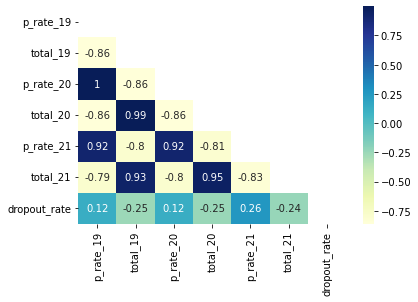

In [58]:
#Make the dataframe into matrix
df_mx=df.corr()

#Display results
display(df_mx)

#Creating mask
mask = np.triu(np.ones_like(df.corr()))
 
#Plotting a triangle correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=mask)

#Save photo
plt.savefig('heatmap.png')

# Displaying triangle heatmap
plt.show()

From the triangle heatmap, it is observed that :
- dropout rate is correlated to the total SAT Score to a certain extent.
- the total SAT score from year to year are strongly coorelated. 
- as the range of years of the total SAT score are closer to each other, the correlation between each other becomes stronger.

### Triangle Pair Gird

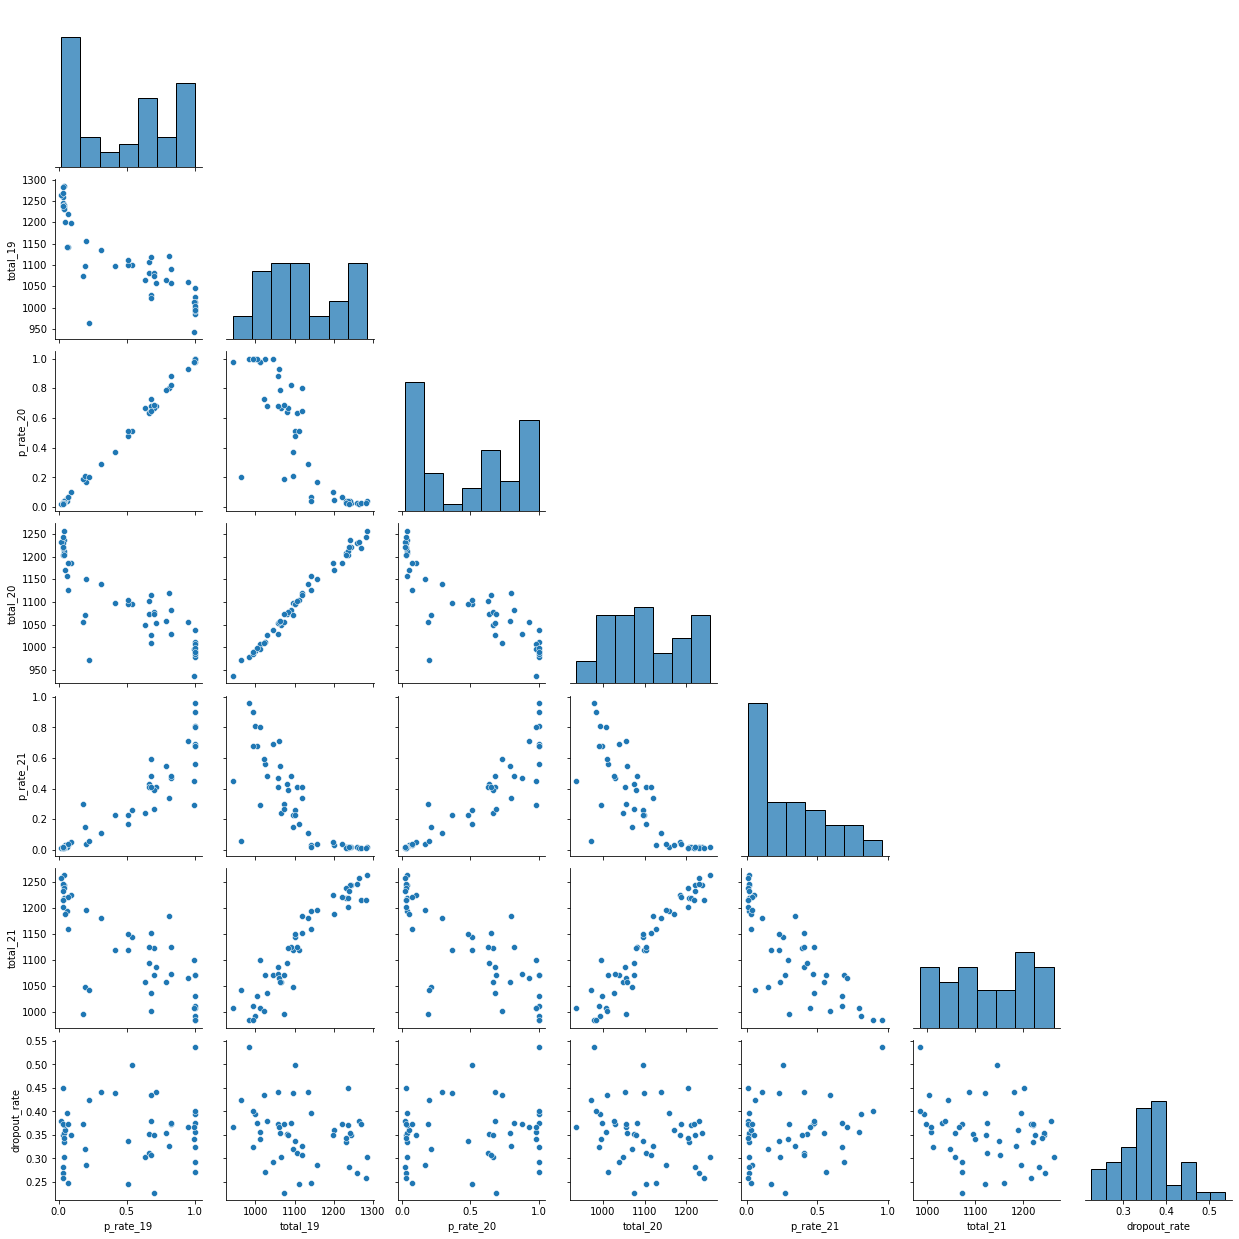

In [59]:
sns.pairplot(df,corner=True)
#Save photo
plt.savefig('Triangle_Pair_grid.png')

# Displaying triangle heatmap
plt.show()

From the pair plot, we are finding the relationships between different variables.

### Scattered Joint Plots

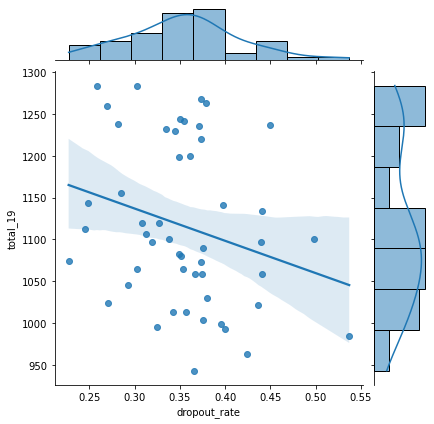

In [60]:
#Total Score in 2019 vs Dropout Rate
sns.jointplot(x="dropout_rate",y="total_19",data=df,kind="reg")

#Save photo
plt.savefig('Scattered Joint Plots 2019.png')

# Displaying triangle heatmap
plt.show()

It is observed that as the total score in 2019 decreases, the dropout rate increases.

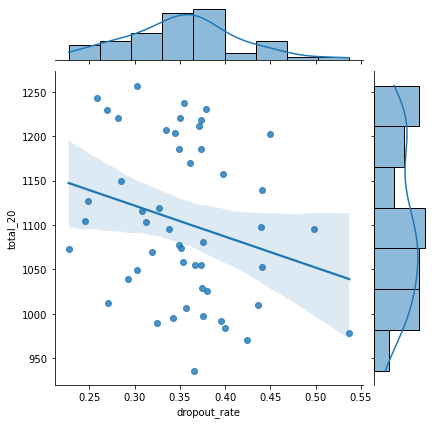

In [61]:
#Total Score in 2020 vs Dropout Rate
sns.jointplot(x="dropout_rate",y="total_20",data=df,kind="reg")

#Save photo
plt.savefig('Scattered Joint Plots 2020.png')

# Displaying triangle heatmap
plt.show()

It is observed that as the total score in 2020 decreases, the dropout rate increases.

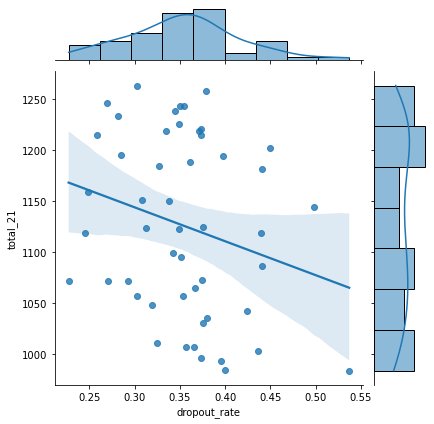

In [62]:
#Total Score in 2021 vs Dropout Rate
sns.jointplot(x="dropout_rate",y="total_21",data=df,kind="reg")
#Save photo
plt.savefig('Scattered Joint Plots 2021.png')

# Displaying triangle heatmap
plt.show()

It is observed that as the total score in 2021 decreases, the dropout rate increases.

### Density Plot

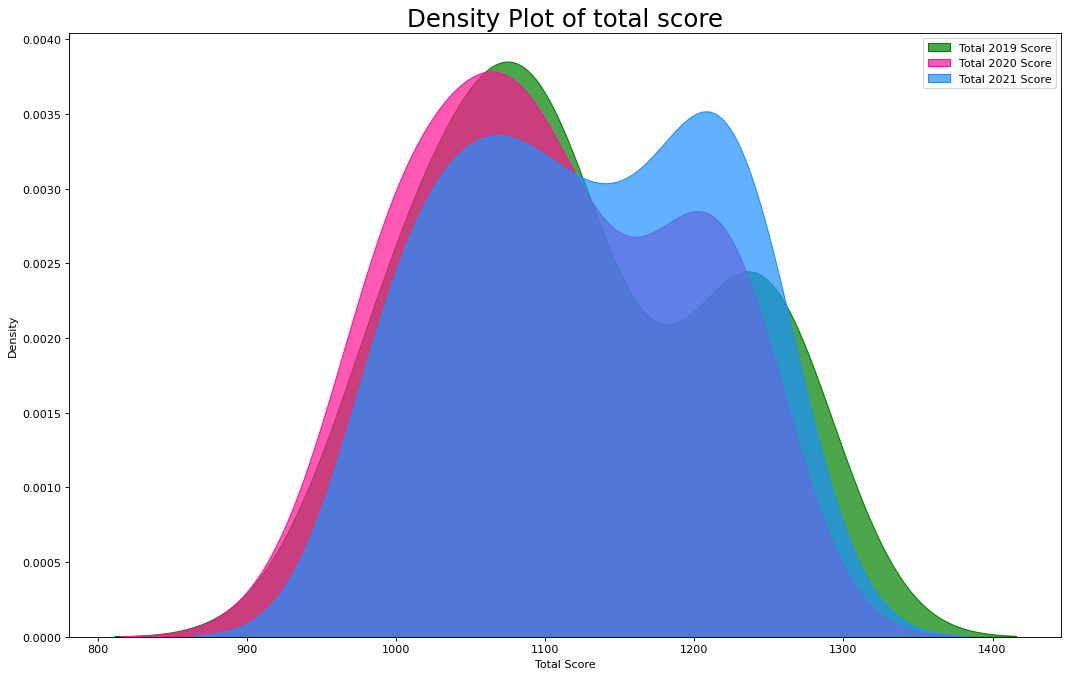

In [63]:
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(df["total_19"], shade=True, color="g", label="Total 2019 Score", alpha=.7)
sns.kdeplot(df["total_20"], shade=True, color="deeppink", label="Total 2020 Score", alpha=.7)
sns.kdeplot(df["total_21"], shade=True, color="dodgerblue", label="Total 2021 Score", alpha=.7)


# Decoration
plt.title('Density Plot of total score', fontsize=22)
plt.xlabel("Total Score")
plt.legend()
plt.show()

Density plot is a probability density function of the variable. It is a smoothed version of the histogram and is used in the same concept.
As seen in the density plot, the density in 2019,2020 and 2021 the most frequenly score is the 1170,1150 and 1240 respectively.
<br>
As observed in the graph above, the density plot shape starts to change after year 2020. There exist a possibility that the pandamic that occur in 2020 might have causes the change. Further analysis and future data are required to confirm the change. 

In [64]:
import scipy.stats as sps 
#confidence inverval function
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), sps.sem(a)
    h = se * sps.t.ppf((1 + confidence) / 2., n-1)
    return m.round(3), (m-h).round(3), (m+h).round(3)

In [65]:
#confidence interval at 95% for drop out
mean_confidence_interval(df["dropout_rate"])

(0.354, 0.336, 0.372)

The confidence interval at 95% for drop out is 35.4% to 37.2%.

## Conclusions & Recommendations

The analysis will have a more accurate results if the following limitaitons are solved:
- Time constraint
- More background data on the students who dropped out
- More data on how pandamic that occur in 2020 changes the total sat score distribution
<br>

The key takeaway is that there is correlation between dropout with the total SAT scores by the students by a certain extent. This means that there are other highly more correlated factors that causes the dropout of university and further research is required.
<br>
Therefore, standardized test can only be **one of the ways** to predict and reducing the number of dropouts and it should be combined with other correlated factors for more accuracy.
<br>
In the future, I hope that I can implement features such as forcasting dropouts of student using of machine learning.